In [1]:
# read csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression

df = pd.read_csv('diamonds.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
# print all the cut, clarity and color
cut = df['cut'].unique().tolist()
clarity = df['clarity'].unique().tolist()
color = df['color'].unique().tolist()
print('cut: ',cut)
print('clarity: ',clarity)
print('color: ',color)

cut:  ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
clarity:  ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
color:  ['E', 'I', 'J', 'H', 'F', 'G', 'D']


In [3]:
# replace cut from string to integer
df = df.replace('Ideal',5 );
df = df.replace('Premium',4)
df = df.replace('Very Good', 3)
df = df.replace('Good', 2)
df = df.replace('Fair', 1)
# replace clarity from string to integer
df = df.replace('I1', 1)
df = df.replace('SI2', 2)
df = df.replace('SI1', 3)
df = df.replace('VS2', 4)
df = df.replace('VS1', 5)
df = df.replace('VVS2', 6)
df = df.replace('VVS1', 7)
df = df.replace('IF', 8)
# replace color from string to integer
df = df.replace('J', 1)
df = df.replace('I', 2)
df = df.replace('H', 3)
df = df.replace('G', 4)
df = df.replace('F', 5)
df = df.replace('E', 6)
df = df.replace('D', 7)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df_2cut = df[df.cut.isin([2])]
df_2cut_7color = df_2cut[df_2cut.color.isin([7])]
df_2cut_7color_8clarity = df_2cut_7color[df_2cut_7color.clarity.isin([8])]
df_2cut_7color_8clarity

,carat,cut,color,clarity,depth,table,price,x,y,z
3342,0.50,2,7,8,63.2,59.0,3378,4.99,5.04,3.17
3971,0.55,2,7,8,58.0,62.0,3509,5.31,5.41,3.12
25924,1.01,2,7,8,63.2,59.0,15081,6.34,6.38,4.02
25925,1.01,2,7,8,63.4,59.0,15081,6.26,6.39,4.01
26407,1.00,2,7,8,63.3,59.0,15928,6.33,6.37,4.02
26634,1.09,2,7,8,58.7,61.0,16406,6.75,6.85,3.99
27196,1.14,2,7,8,61.7,63.0,17499,6.64,6.74,4.13
41831,0.32,2,7,8,57.8,56.0,1252,4.55,4.65,2.66
49619,0.46,2,7,8,58.6,59.0,2139,5.06,5.11,2.98


In [9]:
df_5cut = df[df.cut.isin([5])]
df_5cut_7color = df_5cut[df_5cut.color.isin([7])]
df_5cut_7color_8clarity = df_5cut_7color[df_5cut_7color.clarity.isin([8])]
df_5cut_7color_8clarity

,carat,cut,color,clarity,depth,table,price,x,y,z
3680,0.51,5,7,8,62.0,56.0,3446,5.14,5.18,3.20
3682,0.51,5,7,8,62.1,55.0,3446,5.12,5.13,3.19
4000,0.53,5,7,8,61.5,54.0,3517,5.27,5.21,3.22
5345,0.53,5,7,8,62.2,55.0,3812,5.17,5.19,3.22
5457,0.63,5,7,8,61.2,53.0,3832,5.55,5.60,3.41
7037,0.59,5,7,8,60.7,58.0,4161,5.45,5.49,3.32
7320,0.59,5,7,8,60.9,57.0,4208,5.40,5.43,3.30
7357,0.56,5,7,8,62.4,56.0,4216,5.24,5.28,3.28
7809,0.56,5,7,8,61.9,57.0,4293,5.28,5.31,3.28
9600,0.56,5,7,8,60.8,58.0,4632,5.35,5.31,3.24


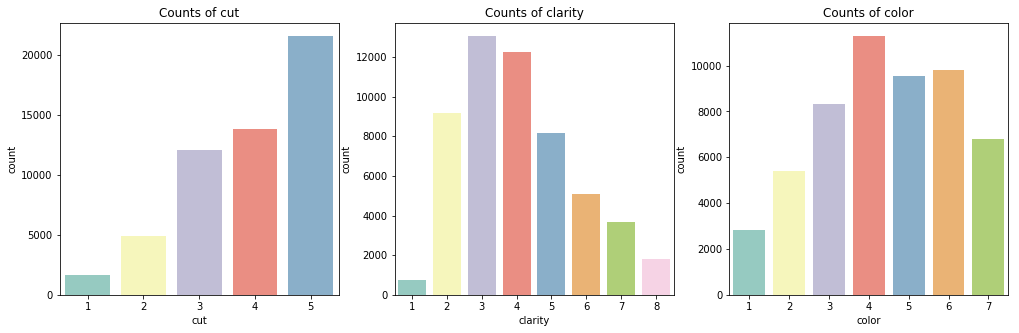

In [4]:
# cut, color, clarity distributions
c = ['cut','clarity','color']

plt.figure(figsize=(17,5))
for i in range(len(c)):
    plt.subplot(1,3,i+1)
    sns.countplot(df[c[i]], palette='Set3');
    plt.title('Counts of {}'.format(c[i]))
    
# plt.savefig('distribution.png')

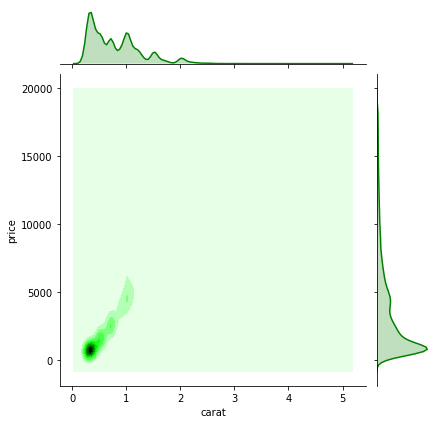

In [6]:
# carat, price distributions
sns.jointplot(x='carat', y='price',kind='kde', data=df,color='g');

In [7]:
# add a column as price per carat
def div(a, b):
    return a / b

df['price_per_carat'] = df.apply(lambda row: div(row['price'], row['carat']), axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75,1080.645161


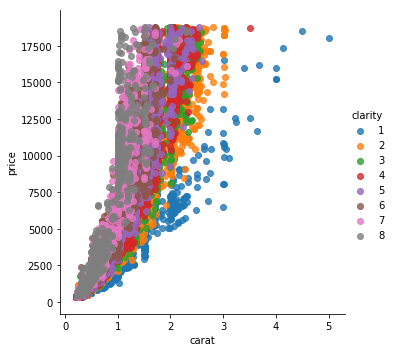

In [8]:
# the better clarity is, the the greater impact on price the carat gets 
sns.lmplot("carat", "price", hue='clarity', data=df, fit_reg=False);

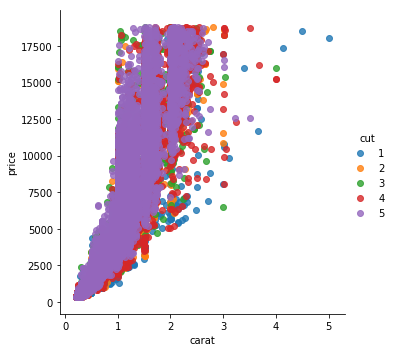

In [9]:
# cut quality has little correlation on price per carat
sns.lmplot("carat", "price", hue='cut', data=df, fit_reg=False);

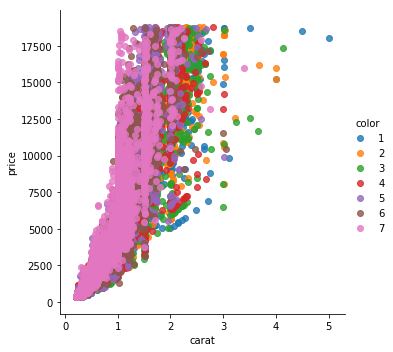

In [10]:
# the better color is, the the greater impact on price the carat gets
sns.lmplot("carat", "price", hue='color', data=df, fit_reg=False);

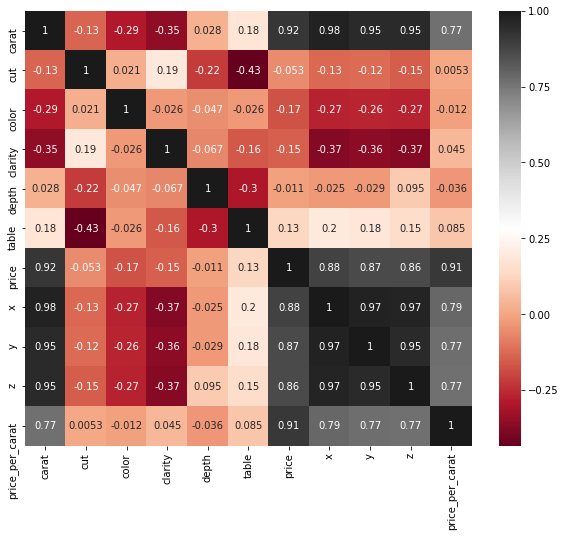

In [11]:
# correlations
corr_matrix = df.corr()
plt.subplots(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap = "RdGy")
plt.show()
#plt.savefig('corr.png')

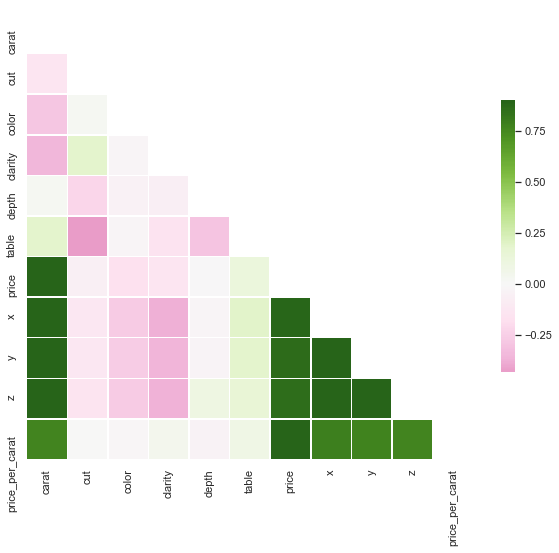

In [12]:
# correlations
diamonds = df.corr()
sns.set(style="white")
mask = np.zeros_like(diamonds, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(diamonds, mask=mask, cmap="PiYG", vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

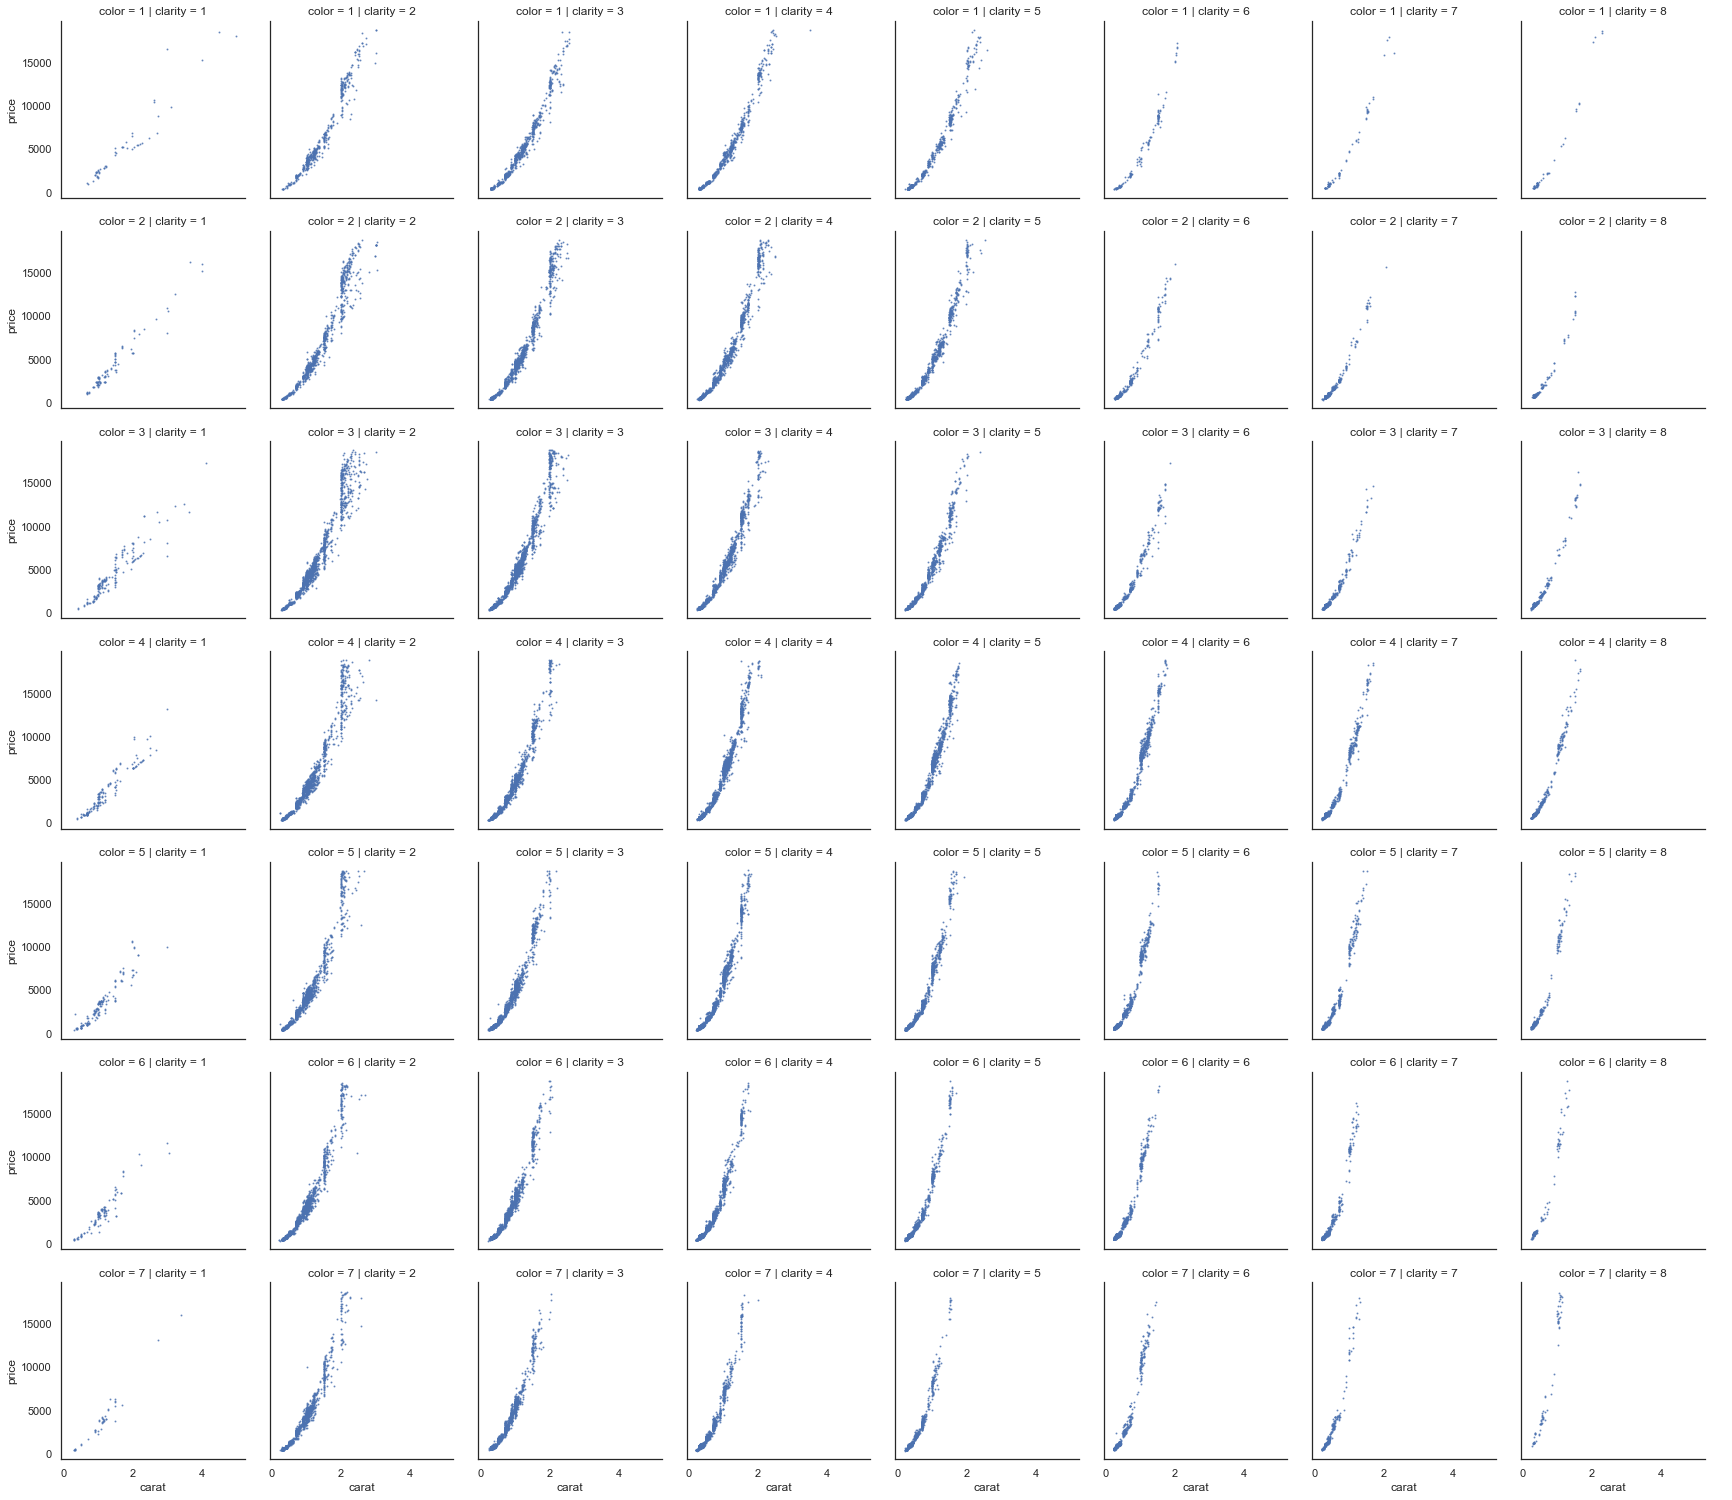

In [13]:
# clarity & color
fg = sns.FacetGrid(data=df, col="clarity",  row="color")
fg.map(plt.scatter, 'carat', 'price',s=1,alpha=.7).add_legend()
#.savefig('price per carat.png')
plt.show()

In [14]:
# how price be affected by carats(clarity)

from sklearn.linear_model import LinearRegression

for i in [1,2,3,4,5,6,7,8]:
    model = LinearRegression(fit_intercept=True)
    x = df[df.clarity.isin([i])]['carat'].values
    X = x[:, np.newaxis] 
    y = df[df.clarity.isin([i])]['price'].values
    model.fit(X,y)
    print('clarity=',i,': ',model.coef_)


clarity= 1 :  [4209.79340046]
clarity= 2 :  [7870.25544007]
clarity= 3 :  [8090.3475054]
clarity= 4 :  [8626.15697327]
clarity= 5 :  [9000.72595443]
clarity= 6 :  [10077.18805124]
clarity= 7 :  [10469.25026504]
clarity= 8 :  [11625.44062662]


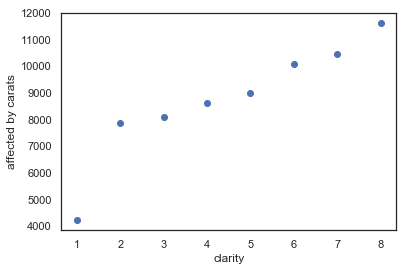

In [15]:
x = np.array([1,2,3,4,5,6,7,8])
y = np.array([4209.79340046,7870.25544007,8090.3475054,8626.15697327,9000.72595443,10077.18805124,10469.25026504,11625.44062662])
plt.scatter(x,y)
plt.xlabel('clarity')
plt.ylabel('affected by carats');
# plt.savefig('affacted by carats1.png')

In [16]:
# how price be affected by carats(cut)

from sklearn.linear_model import LinearRegression

for i in [1,2,3,4,5,6,7]:
    model = LinearRegression(fit_intercept=True)
    x = df[df.color.isin([i])]['carat'].values
    X = x[:, np.newaxis] 
    y = df[df.color.isin([i])]['price'].values
    model.fit(X,y)
    print('cut quality=',i,': ',model.coef_)


cut quality= 1 :  [7094.19209226]
cut quality= 2 :  [7761.04116881]
cut quality= 3 :  [7619.0983199]
cut quality= 4 :  [8525.34577932]
cut quality= 5 :  [8676.65834379]
cut quality= 6 :  [8296.21278346]
cut quality= 7 :  [8408.35312588]


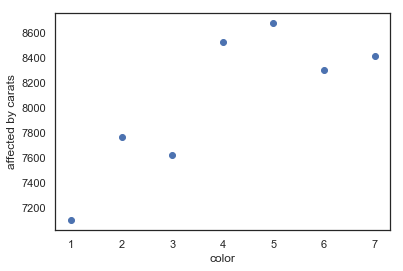

In [17]:
x = np.array([1,2,3,4,5,6,7])
y = np.array([7094.19209226,7761.04116881,7619.0983199,8525.34577932,8676.65834379,8296.21278346,8408.35312588])
plt.scatter(x,y)
plt.xlabel('color')
plt.ylabel('affected by carats');
# plt.savefig('affacted by carats2.png')

In [18]:
# by each combination of cut(5), clarity(8) and color(7)
df_cu_cl_co = pd.DataFrame(columns=('cut','clarity','color','mean_price','mean_price_per_carat','mean_carat'))

for i in [1,2,3,4,5]:
    for j in [1,2,3,4,5,6,7,8]:
        for k in [1,2,3,4,5,6,7]:
            #print('cut=',i,',','clarity=',j,': $', df[df.cut.isin([i])][df[df.cut.isin([i])].clarity.isin([j])]['price per carat'].mean())
            df_cu_cl_co.loc[((i-1)*8+j-1)*7+k] = [i,j,k,
                                            df[df.cut.isin([i])][df[df.cut.isin([i])].clarity.isin([j])][df[df.cut.isin([i])][df[df.cut.isin([i])].clarity.isin([j])].color.isin([k])]['price'].mean(),
                                            df[df.cut.isin([i])][df[df.cut.isin([i])].clarity.isin([j])][df[df.cut.isin([i])][df[df.cut.isin([i])].clarity.isin([j])].color.isin([k])]['price_per_carat'].mean(),
                                            df[df.cut.isin([i])][df[df.cut.isin([i])].clarity.isin([j])][df[df.cut.isin([i])][df[df.cut.isin([i])].clarity.isin([j])].color.isin([k])]['carat'].mean()]
df_cu_cl_co

,cut,clarity,color,mean_price,mean_price_per_carat,mean_carat
1,1.0,1.0,1.0,5795.043478,2631.006569,1.993478
2,1.0,1.0,2.0,3501.000000,2457.482836,1.322941
3,1.0,1.0,3.0,4212.961538,2545.089631,1.498654
4,1.0,1.0,4.0,3187.471698,2250.050295,1.226415
5,1.0,1.0,5.0,2543.514286,2187.008728,1.023429
6,1.0,1.0,6.0,2095.222222,2137.243991,0.968889
7,1.0,1.0,7.0,7383.000000,3594.193601,1.877500
8,1.0,2.0,1.0,5131.814815,3445.956465,1.316667
9,1.0,2.0,2.0,6658.022222,3998.325857,1.511556
10,1.0,2.0,3.0,6022.406593,3996.158497,1.364396


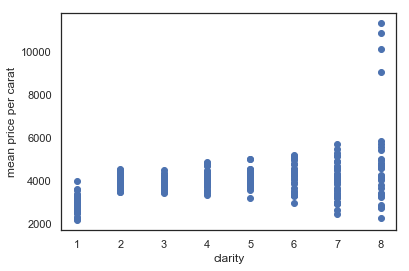

In [19]:
# mean price per carat by clarity (there're four outliers in this picture)
x = df_cu_cl_co['clarity']
y = df_cu_cl_co['mean_price_per_carat']
plt.scatter(x,y)
plt.xlabel('clarity')
plt.ylabel('mean price per carat');
# plt.savefig('clarity price distribution.png')

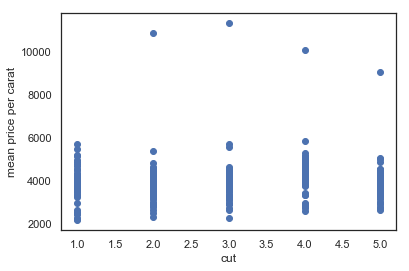

In [20]:
# mean price per carat by cut (there're four outliers in this picture)
x = df_cu_cl_co['cut']
y = df_cu_cl_co['mean_price_per_carat']
plt.scatter(x,y)
plt.xlabel('cut')
plt.ylabel('mean price per carat');
#plt.savefig('clarity price distribution.png')

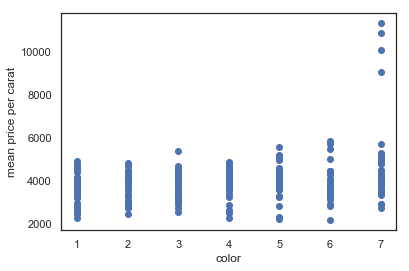

In [21]:
# mean price per carat by color (there're four outliers in this picture)
x = df_cu_cl_co['color']
y = df_cu_cl_co['mean_price_per_carat']
plt.scatter(x,y)
plt.xlabel('color')
plt.ylabel('mean price per carat');
#plt.savefig('clarity price distribution.png')

In [22]:
# find four outliers
four_outliers = df_cu_cl_co[df_cu_cl_co['mean_price_per_carat']>8000]
four_outliers
# All of them are top-clarity and top-color. But not necessarily top-cutted.

,cut,clarity,color,mean_price,mean_price_per_carat,mean_carat
112,2.0,8.0,7.0,10030.333333,10876.804720,0.786667
168,3.0,8.0,7.0,10298.260870,11346.512102,0.803043
224,4.0,8.0,7.0,9056.500000,10099.077901,0.708000
280,5.0,8.0,7.0,6567.178571,9034.176510,0.615714


In [23]:
# features on diff cut
df_cu = pd.DataFrame(columns=('cut','mean price','mean price per carat','mean carat'))

for i in [1,2,3,4,5]:
    df_cu.loc[i] = [i,
                    df[df.cut.isin([i])]['price'].mean(),
                    df[df.cut.isin([i])]['price_per_carat'].mean(),
                    df[df.cut.isin([i])]['carat'].mean()]
df_cu

,cut,mean price,mean price per carat,mean carat
1,1.0,4358.757764,3767.255681,1.046137
2,2.0,3928.864452,3860.027680,0.849185
3,3.0,3981.759891,4014.128366,0.806381
4,4.0,4584.257704,4222.905374,0.891955
5,5.0,3457.541970,3919.699825,0.702837


In [24]:
# features on diff clarity
df_cl = pd.DataFrame(columns=('clarity','mean price','mean price per carat','mean carat'))

for i in [1,2,3,4,5,6,7,8]:
    df_cl.loc[i] = [i,
                    df[df.clarity.isin([i])]['price'].mean(),
                    df[df.clarity.isin([i])]['price_per_carat'].mean(),
                    df[df.clarity.isin([i])]['carat'].mean()]
df_cl

,clarity,mean price,mean price per carat,mean carat
1,1.0,3924.168691,2796.296437,1.283846
2,2.0,5063.028606,4010.853865,1.077648
3,3.0,3996.001148,3849.078018,0.850482
4,4.0,3924.989395,4080.526787,0.763935
5,5.0,3839.455391,4155.816808,0.727158
6,6.0,3283.737071,4204.166013,0.596202
7,7.0,2523.114637,3851.410558,0.503321
8,8.0,2864.839106,4259.931736,0.505123


In [25]:
# features on diff color
df_co = pd.DataFrame(columns=('clarity','mean price','mean price per carat','mean carat'))

for i in [1,2,3,4,5,6,7]:
    df_co.loc[i] = [i,
                    df[df.color.isin([i])]['price'].mean(),
                    df[df.color.isin([i])]['price_per_carat'].mean(),
                    df[df.color.isin([i])]['carat'].mean()]
df_co

,clarity,mean price,mean price per carat,mean carat
1,1.0,5323.818020,3825.649192,1.162137
2,2.0,5091.874954,3996.402051,1.026927
3,3.0,4486.669196,4008.026941,0.911799
4,4.0,3999.135671,4163.411524,0.771190
5,5.0,3724.886397,4134.730684,0.736538
6,6.0,3076.752475,3804.611475,0.657867
7,7.0,3169.954096,3952.564280,0.657795


In [26]:
# Mean price map - cut vs clarity
cmap = sns.cubehelix_palette(rot=.3, as_cmap=True)
ct = pd.crosstab(df.cut, df.clarity, df.price, aggfunc=np.mean)
ct.style.background_gradient(cmap=cmap, axis=1)

clarity,1,2,3,4,5,6,7,8
cut,,,,,,,,
1,3703.53,5173.92,4208.28,4174.72,4165.14,3349.77,3871.35,1912.33
2,3596.64,4580.26,3689.53,4262.24,3801.45,3079.11,2254.77,4098.32
3,4078.23,4988.69,3932.39,4215.76,3805.35,3037.77,2459.44,4396.22
4,3947.33,5545.94,4455.27,4550.33,4485.46,3795.12,2831.21,3856.14
5,4335.73,4755.95,3752.12,3284.55,3489.74,3250.29,2468.13,2272.91


In [27]:
# Mean price map - color vs clarity
cmap = sns.cubehelix_palette(rot=.3, as_cmap=True)
ct = pd.crosstab(df.color, df.clarity, df.price, aggfunc=np.mean)
ct.style.background_gradient(cmap=cmap, axis=1)

clarity,1,2,3,4,5,6,7,8
color,,,,,,,,
1,5254.06,6520.96,5186.05,5311.06,4884.46,5142.4,4034.18,3363.88
2,4302.18,7002.65,5355.02,5690.51,4633.18,2968.23,2034.86,1994.94
3,4453.41,6099.9,5032.41,4722.41,3780.69,2649.07,1845.66,2287.87
4,3545.69,5021.68,3774.79,4416.26,4131.36,3845.28,2866.82,2558.03
5,3342.18,4472.63,3714.23,3756.8,3796.72,3475.51,2804.28,2750.84
6,3488.42,4173.83,3161.84,2750.94,2856.29,2499.67,2219.82,3668.51
7,3863.02,3931.1,2976.15,2587.23,3030.16,3351.13,2947.91,8307.37


In [28]:
# Mean price map - color vs cut
cmap = sns.cubehelix_palette(rot=.3, as_cmap=True)
ct = pd.crosstab(df.color, df.cut, df.price, aggfunc=np.mean)
ct.style.background_gradient(cmap=cmap, axis=1)

cut,1,2,3,4,5
color,,,,,
1,4975.66,4574.17,5103.51,6294.59,4918.19
2,4685.45,5078.53,5255.88,5946.18,4451.97
3,5135.68,4276.25,4535.39,5216.71,3889.33
4,4239.25,4123.48,3872.75,4500.74,3720.71
5,3827,3495.75,3778.82,4324.89,3374.94
6,3682.31,3423.64,3214.65,3538.91,2597.55
7,4291.06,3405.38,3470.47,3631.29,2629.09


In [29]:
# Mean price per carat map - cut vs clarity
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ct = pd.crosstab(df.cut, df.clarity, df.price_per_carat, aggfunc=np.mean)
ct.style.background_gradient(cmap=cmap, axis=1)

clarity,1,2,3,4,5,6,7,8
cut,,,,,,,,
1,2408.68,3849.52,3881.12,4125.85,4097.22,4225.64,4804.24,3941.26
2,2732.78,3790.38,3647.98,4195.3,4055.9,3975.91,3538.73,5072.77
3,2948.74,4025.61,3823.95,4204.89,4104.37,3939.28,3695.18,5399.24
4,2810.76,4162.31,4043.92,4350.01,4444.21,4486.35,4008.32,4849.73
5,3287.59,3947.69,3775.63,3814.12,4042.25,4259.98,3884.91,3850.83


In [30]:
# Mean price per carat map - color vs clarity
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ct = pd.crosstab(df.color, df.clarity, df.price_per_carat, aggfunc=np.mean)
ct.style.background_gradient(cmap=cmap, axis=1)

clarity,1,2,3,4,5,6,7,8
color,,,,,,,,
1,2710.08,4091.03,3775.64,3860.45,3750.35,4064.89,3569.89,3220.23
2,2742.59,4408.04,4075.54,4316.25,3998.21,3334.66,2964.64,3013.21
3,2904.85,4319.84,4198.8,4240.2,3898.53,3401.57,3161.01,3566.94
4,2617.48,3971,3737.55,4405.77,4420.88,4515.09,4011.67,4007.01
5,2768.38,3910.3,3875.62,4198.9,4419.34,4552.22,4243.09,4375.38
6,2906.26,3829.41,3654.5,3734.33,3928.46,3935.71,3918.26,5220.98
7,3064.48,3755.89,3644.01,3758.9,4204.89,4749.58,4835.82,9937.42


In [32]:
# Why some low-clarity & low-color diamonds have high price per carat?

df_pricey = df[df['price_per_carat']>6500]
df_odd_color1_clarity_2 = df_pricey[df_pricey.color.isin([1])][df_pricey[df_pricey.color.isin([1])].clarity.isin([2])]
print('color=1&clarity=2 but price per carat is high: the mean carat of this kind of diamonds is',df_odd_color1_clarity_2['carat'].mean())
df_pricey = df[df['price_per_carat']>7000]
df_odd_color2_clarity_2 = df_pricey[df_pricey.color.isin([2])][df_pricey[df_pricey.color.isin([2])].clarity.isin([2])]
print('color=2&clarity=2 but price per carat is high: the mean carat of this kind of diamonds is',df_odd_color2_clarity_2['carat'].mean())
df_pricey = df[df['price_per_carat']>7000]
df_odd_color3_clarity_2 = df_pricey[df_pricey.color.isin([3])][df_pricey[df_pricey.color.isin([3])].clarity.isin([2])]
print('color=3&clarity=2 but price per carat is high: the mean carat of this kind of diamonds is',df_odd_color3_clarity_2['carat'].mean())

'''
The reason is this kind of diamonds are usually bigger than other diamonds.(>2.1 carat)
As we can see, price per carat is increased with the weight. Which means a big whole diamond is more expensive than
a bunch of small diamonds in the same weight, sometimes even if the big one's color and clarity is lower than this 
bunch of small diamonds.
'''

color=1&clarity=2 but price per carat is high: the mean carat of this kind of diamonds is 2.4414285714285713
color=2&clarity=2 but price per carat is high: the mean carat of this kind of diamonds is 2.2021428571428565
color=3&clarity=2 but price per carat is high: the mean carat of this kind of diamonds is 2.1063559322033902


"\nThe reason is this kind of diamonds are usually bigger than other diamonds.(>2.1 carat)\nAs we can see, price per carat is increased with the weight. Which means a big whole diamond is more expensive than\na bunch of small diamonds in the same weight, sometimes even if the big one's color and clarity is lower than this \nbunch of small diamonds.\n"

In [33]:
# eliminate the disturbance of carats
df_1carat = df[df['carat']==1.0]
df_1carat.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
284,1.0,4,2,2,58.2,60.0,2795,6.61,6.55,3.83,2795.0
324,1.0,4,1,2,62.3,58.0,2801,6.45,6.34,3.98,2801.0
369,1.0,1,4,1,66.4,59.0,2808,6.16,6.09,4.07,2808.0
384,1.0,1,1,4,65.7,59.0,2811,6.14,6.07,4.01,2811.0
465,1.0,4,3,1,61.3,60.0,2818,6.43,6.39,3.93,2818.0


In [35]:
# This time the clarity and the color are playing key parts on price per carat.
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ct = pd.crosstab(df_1carat.color, df_1carat.clarity, df_1carat.price_per_carat, aggfunc=np.mean)
ct.style.background_gradient(cmap=cmap, axis=1)

clarity,1,2,3,4,5,6,7,8
color,,,,,,,,
1,1732.5,3200.58,3630.83,3724.42,3814.78,3564.5,4675,nan
2,1987.25,3495.05,3961.97,4267.53,4457.41,4032,4445,nan
3,2665.57,3797.34,4502.85,4840.91,5099.11,5445.8,6233.6,7235
4,2591.71,3835.44,4570.8,5785.85,6232.77,7318.35,7801.8,7832
5,2780.83,4075.12,4857.32,6133.95,6733.77,8454.83,9238.22,9833.4
6,3366.29,4189.79,5188.92,6479.21,7369.09,8663.39,9010,11084
7,2657,4324.8,5454.81,6639.54,7694.06,9712,12000.7,16156.7


In [36]:
# Mean price per carat map - color vs cut
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ct = pd.crosstab(df.color, df.cut, df.price_per_carat, aggfunc=np.mean)
ct.style.background_gradient(cmap=cmap, axis=1)

cut,1,2,3,4,5
color,,,,,
1,3345.94,3524.27,3792.5,4140.52,3733.77
2,3514.65,3907.22,4111.27,4267.22,3808.07
3,3831.51,3825.52,4034.24,4278.49,3846.07
4,3699.34,4087.37,4054.56,4320.51,4164
5,3788.02,3820.56,4142.19,4357.8,4097.52
6,3820.46,3806.25,3821.53,3987.88,3683.17
7,4244.56,3846,4072.81,4111.56,3806.53


In [37]:
# Mean carat map - cut vs clarity
cmap = sns.cubehelix_palette(rot=-.4, as_cmap=True)
ct = pd.crosstab(df.cut, df.clarity, df.carat, aggfunc=np.mean)
ct.style.background_gradient(cmap=cmap, axis=1)

clarity,1,2,3,4,5,6,7,8
cut,,,,,,,,
1,1.361,1.20384,0.964632,0.885249,0.879824,0.691594,0.664706,0.474444
2,1.20302,1.03523,0.830397,0.850787,0.757685,0.61493,0.502312,0.616338
3,1.2819,1.06434,0.845978,0.811181,0.733307,0.566389,0.494588,0.618769
4,1.28702,1.14416,0.908601,0.833774,0.793308,0.654724,0.534821,0.603478
5,1.22267,1.00793,0.801808,0.670566,0.674714,0.586213,0.49596,0.455041


In [38]:
# Mean carat map - color vs clarity
cmap = sns.cubehelix_palette(rot=-.4, as_cmap=True)
ct = pd.crosstab(df.color, df.clarity, df.carat, aggfunc=np.mean)
ct.style.background_gradient(cmap=cmap, axis=1)

clarity,1,2,3,4,5,6,7,8
color,,,,,,,,
1,1.7506,1.42426,1.17283,1.13465,1.01744,1.02847,0.843243,0.703922
2,1.43924,1.39505,1.07687,1.06302,0.903077,0.678411,0.55493,0.515944
3,1.43833,1.24109,0.990945,0.898704,0.754209,0.582089,0.480496,0.505385
4,1.2226,1.06747,0.81961,0.797946,0.728254,0.655107,0.536116,0.491821
5,1.08559,0.9867,0.800849,0.696311,0.681723,0.589877,0.495327,0.460909
6,1.10618,0.921576,0.711303,0.592231,0.573411,0.475621,0.425808,0.506266
7,1.11714,0.872168,0.668401,0.558321,0.583021,0.52859,0.478849,0.698767


In [39]:
# Mean carat map - cut vs color
cmap = sns.cubehelix_palette(rot=-.4, as_cmap=True)
ct = pd.crosstab(df.color, df.cut, df.carat, aggfunc=np.mean)
ct.style.background_gradient(cmap=cmap, axis=1)

cut,1,2,3,4,5
color,,,,,
1,1.34118,1.09954,1.13322,1.29309,1.06359
2,1.19806,1.05722,1.04695,1.14494,0.913029
3,1.21917,0.914729,0.915948,1.01645,0.799525
4,1.02382,0.850896,0.766799,0.841488,0.700715
5,0.904712,0.77593,0.740961,0.827036,0.655829
6,0.856607,0.745134,0.676317,0.717745,0.578401
7,0.920123,0.744517,0.696424,0.721547,0.565766


In [40]:
# Count diamonds - cut vs clarity
cmap = sns.cubehelix_palette(rot=.1, as_cmap=True)
ct = pd.crosstab(df.cut, df.clarity)
ct.style.background_gradient(cmap=cmap, axis=1)

clarity,1,2,3,4,5,6,7,8
cut,,,,,,,,
1,210,466,408,261,170,69,17,9
2,96,1081,1560,978,648,286,186,71
3,84,2100,3240,2591,1775,1235,789,268
4,205,2949,3575,3357,1989,870,616,230
5,146,2598,4282,5071,3589,2606,2047,1212


In [41]:
# Count diamonds - color vs clarity
cmap = sns.cubehelix_palette(rot=.1, as_cmap=True)
ct = pd.crosstab(df.color, df.clarity)
ct.style.background_gradient(cmap=cmap, axis=1)

clarity,1,2,3,4,5,6,7,8
color,,,,,,,,
1,50,479,750,731,542,131,74,51
2,92,912,1424,1169,962,365,355,143
3,162,1563,2275,1643,1169,608,585,299
4,150,1548,1976,2347,2148,1443,999,681
5,143,1609,2131,2201,1364,975,734,385
6,102,1713,2426,2470,1281,991,656,158
7,42,1370,2083,1697,705,553,252,73


In [42]:
# Count diamonds - cut vs color
cmap = sns.cubehelix_palette(rot=.1, as_cmap=True)
ct = pd.crosstab(df.color, df.cut)
ct.style.background_gradient(cmap=cmap, axis=1)

cut,1,2,3,4,5
color,,,,,
1,119,307,678,808,896
2,175,522,1204,1428,2093
3,303,702,1824,2360,3115
4,314,871,2299,2924,4884
5,312,909,2164,2331,3826
6,224,933,2400,2337,3903
7,163,662,1513,1603,2834


In [43]:
# Prediction

In [44]:
# split the data
X = df.drop(['price'], axis = 1).values
y = df['price'].values
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [45]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=1, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))
model = PolynomialRegression(1)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
from sklearn.metrics import r2_score
r2_score(ytest, y_model)

0.9794356636239624

In [46]:
# Linear Regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

lr = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=11)
scores = cross_val_score(lr, Xtrain, ytrain, scoring='r2', cv=kf, n_jobs=5)
print('linear regression:')                         
print(scores)
print('Average R-Squared Score:', np.mean(scores),'\n')

linear regression:
[0.98071809 0.97688003 0.98012449 0.97036095 0.9754577 ]
Average R-Squared Score: 0.976708252352482 



In [47]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
rg = Ridge()
kf = KFold(n_splits=5, shuffle=True, random_state=11)
scores = cross_val_score(rg, Xtrain, ytrain, scoring='r2', cv=kf, n_jobs=5)
print('ridge regression:')  
print(scores)
print('Average R-Squared Score:', np.mean(scores),'\n')

ridge regression:
[0.98067411 0.97684154 0.98008439 0.97044294 0.9754912 ]
Average R-Squared Score: 0.97670683631277 



In [48]:
# RandomForestRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
rf = RandomForestRegressor()
kf = KFold(n_splits=5, shuffle=True, random_state=11)
scores = cross_val_score(rf, Xtrain, ytrain, scoring='r2', cv=kf, n_jobs=5)
print('random forest regression:')  
print(scores)
print('Average R-Squared Score:', np.mean(scores),'\n')

random forest regression:
[0.99959711 0.99955644 0.99966736 0.99953377 0.99951707]
Average R-Squared Score: 0.9995743508709953 

